<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Magíster en Data Science</em><br>
    <em>Profesor: Boris Panes</em><br>

</div>

### Análisis de Datos: Tarea 02
#### Integrantes: 
` Mariangel Arrieta, Giuseppe Lavarello, Ingrid Solís, Rosario Valderrama `

#### 1. Importes

In [38]:
import pandas as pd               #Manejo de datos en Tablas
import numpy as np
from  matplotlib import pyplot as plt   #Creación de visualizaciones 
import seaborn as sns             #Creación de visualizaciones  
import statsmodels.api as sm

sns.set_theme() #inicializacion de tematica de seaborn

#### 2. Lectura de archivo

In [48]:
# Ruta relativa al archivo
ruta_archivo = r'.\Data\2023-03-08 Precios Casas RM Limpio.csv'
df = pd.read_csv(ruta_archivo, index_col=0)
# Mostrar las primeras filas del DataFrame
df.head(10)

price_clp  price_uf  price_usd             comuna  \
0  409285000     11500     509695       QuintaNormal   
1  105000000      2950     130760  PedroAguirreCerda   
2  128124000      3600     159557    EstaciónCentral   
3   75000000      2107      93400             Colina   
4   53000000      1489      66002             Colina   
5   94000000      2641     117061    EstaciónCentral   
6   75000000      2107      93400             Colina   
7  105000000      2950     130760          LaFlorida   
8   76000000      2135      94645              Maipú   
9   76000000      2135      94645              Maipú   

                     ubicacion  dorms  baths  built_area  total_area  parking  
0              Hoevel4548y4558      7    4.0       384.0       732.0        3  
1                     Rucalhue      2    1.0       112.0       145.0        1  
2           AvenidaLasParcelas      3    1.0        59.0       243.0        2  
3           PasajeGonzaloRojas      3    1.0       103.0        73.0        1  
4        HernánDíazArrieta2820      2    1.0        57.0        67.0        1  
5              Avenida5deAbril      2    1.0        72.0       131.0        0  
6  GabrielaMistral/PabloNeruda      3    1.0        70.0        80.0        2  
7             SanCristóbalTres      2    1.0        50.0       120.0        1  
8         PasajeJosédeMoraleda      3    1.0        72.0        72.0        1  
9                       Matías      3    1.0        46.0        90.0        1

**Decisión** Se eliminan las columnas price_clp y price_usd pues son colineales con price_uf y no son de utilidad. También se elimina la ubicacion, ya que con la comuna basta.

In [50]:
df.drop(['price_clp','price_usd','ubicacion'],axis=1 ,inplace=True)
df.head()

price_uf             comuna  dorms  baths  built_area  total_area  parking
0     11500       QuintaNormal      7    4.0       384.0       732.0        3
1      2950  PedroAguirreCerda      2    1.0       112.0       145.0        1
2      3600    EstaciónCentral      3    1.0        59.0       243.0        2
3      2107             Colina      3    1.0       103.0        73.0        1
4      1489             Colina      2    1.0        57.0        67.0        1

#### 3. Teoria detrás del modelo

**Ecuación de Regresión Lineal |** $y = \beta_0 + \beta_1 x + \epsilon$

Los parámetros son propiedades de las poblaciones, por lo que nunca podemos conocer sus valores verdaderos a menos que se observe toda la población.

- Las estimaciones de los parámetros se calculan a partir de datos muestrales.
- Las estimaciones se denotan con un ^ sombrero.

**Estimación de la Regresión Lineal |** $\hat{y} = \hat{\beta_0} + \hat{\beta_1} x + \epsilon$

**Coeficientes de Regresión |** Los betas estimados en un modelo de regresión. Se representan como $\hat{\beta_i}$.

**Estimación de Mínimos Cuadrados Ordinarios $MCO$ |** Método común para calcular los coeficientes de regresión lineal $\hat{(\beta)}_n$

**Función de Pérdida |** Una función que mide la distancia entre los valores observados y los valores estimados por el modelo.

##### 3.1 Estimacion de Minimos Cuadrados Ordinarios

El método de mínimos cuadrados ordinarios $MCO$ se utiliza en el análisis de regresión lineal para estimar los parámetros desconocidos del modelo de regresión lineal. El objetivo de la estimación por $MCO$ es encontrar los valores de los coeficientes de regresión que minimicen la suma de los errores al cuadrado entre los valores predichos y los valores reales de la variable dependiente.

**Línea de Mejor Ajuste |** La línea que ajusta mejor los datos al minimizar alguna función de pérdida o error.

**Valores Predichos |** Los valores estimados $y$ para cada $x$ calculados por un modelo.

**Residuo |** La diferencia entre los valores observados o reales y los valores predichos de la línea de regresión.
- Residuo = Observado - Predicho $\rightarrow$ $\epsilon_i = y_i - \hat{y_i}$

**Suma de Residuos al Cuadrado / Residual Sum of Squares (RSS) |** La suma de las diferencias al cuadrado entre cada valor observado y su valor predicho asociado.
- $RSS = \sum\limits_{i=1}^{n}(Observado - Predicho)^2$
- $RSS = \sum\limits_{i=1}^{n}(y_i - \hat{y_i})^2$

**Mínimos Cuadrados Ordinarios (MCO) |** Un método que minimiza la suma de los residuos al cuadrado para estimar los parámetros en un modelo de regresión lineal.
- Usado para calcular: $\hat{y}=\hat{\beta_0} + \hat{\beta_1(x)}$
- Donde se obtiene que : $\hat{\beta_1} = \frac{\sum\limits_{i=1}^{n}(X_i-\bar{X})(Y_i-\bar{Y})}{\sum\limits_{i=1}^{n}(X_i-\bar{X})^2} = \frac{cov_{x,y}}{var_x}$
- $\hat{\beta_0} = \bar{Y} - \hat{\beta_1}\bar{X}$

##### 3.2 Evaluación del ajuste

**Error Stándard de la Regresión $ESR$ |** Parámetro utilizado para evaluar la regresión.
- $ESR = s_e$, donde $s_e^2=\frac{\sum{e_i}^2}{n-2} $

Las unidades de $e_i$ son las mismas que las de $Y_i$, por lo tanto, el valor de $ESR$ proporciona información sobre el error promedio entre las predicciones y los valores observados.  
$ESR$ es el promedio de la suma de los residuos al cuadrado $RSS$ ajustado por los grados de libertad.

**Coeficiente de Determinación $R^2$ |** Medida estadística que indica el porcentaje de variación en la variable dependiente que es explicada por el modelo de regresión.
- $R^2$ toma valores entre 0 y 1. Un valor de $R^2$ cercano a 1 indica que el modelo explica bien la variabilidad de los datos, mientras que un valor cercano a 0 indica que el modelo no lo hace.
  
- Se calcula como:

$R^2 = 1 - \frac{SR}{ST}$ 

Donde:
- $SR$ es la suma de los residuos al cuadrado (suma de los errores entre los valores observados y predichos):
    - $SR = \sum\limits_{i=1}^{n}e_i^2$
- $ST$ es la suma total de los cuadrados (variabilidad total en los datos observados):
    - $ST = \sum\limits_{i=1}^{n}(Y_i - \bar{Y})^2$

En este caso particular, se cumple que:
- $R^2 = r^2 = \frac{Cov^2(X,Y)}{Var(X)Var(Y)}$


#### 4 Selección de variables

**Objetivo** Creamos una matriz de gráficos de dispersión entre todas las combinaciones de las variables numéricas del Dataframe, para visualizar la relación entre cada una de ellas.

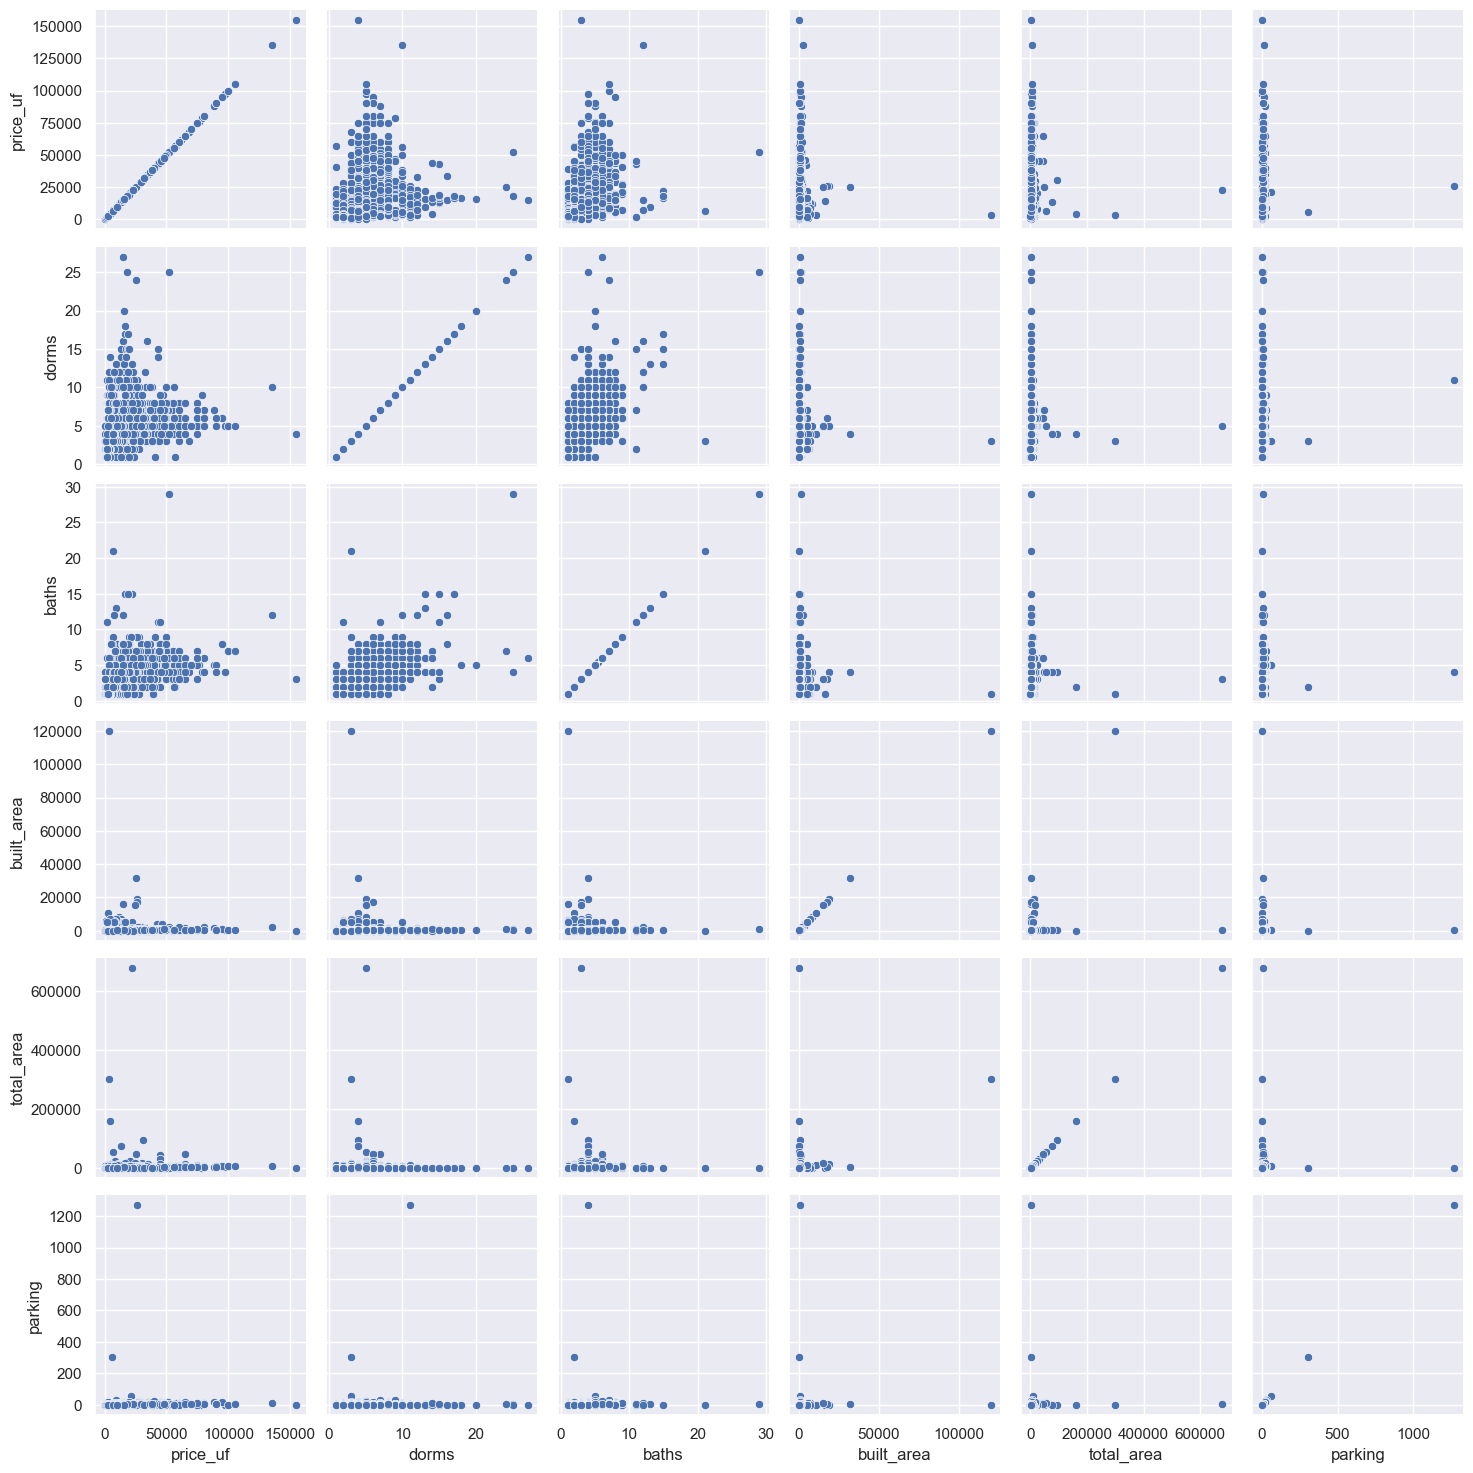

In [55]:
sns.pairplot(df.select_dtypes(include=np.number),diag_kind=None)

plt.show()

#### Relación entre `price_uf y otras variables:`

**price_uf vs dorms:**
Se observa una cierta dispersión, aunque parece haber varios puntos que muestran que conforme aumentan los dormitorios, el precio también tiende a aumentar. Sin embargo, la relación no parece ser completamente lineal, lo que sugiere que el número de dormitorios tiene cierto efecto en el precio, pero quizás no de manera directa o con mucho ruido en los datos.

**price_uf vs baths:**
La relación es parecida a la que se ve con los dormitorios: a mayor número de baños, el precio parece aumentar, pero hay bastante dispersión en los puntos. A partir de cierto número de baños (alrededor de 10), la relación se vuelve más difusa, lo que podría indicar outliers o propiedades muy especiales que no siguen la tendencia general.

**price_uf vs built_area:**
Se observa una relación más clara y positiva: a mayor área construida, mayor es el precio. Aunque hay algunos puntos fuera del rango (outliers), esta variable parece estar más fuertemente correlacionada con el precio que los dormitorios o baños.

**price_uf vs total_area:**
También se puede ver una relación positiva, la correlación entre el área total y el precio parece más dispersa que en el caso de built_area. Esto podría significar que la superficie construida tiene más peso en el precio que la superficie total de la propiedad.


#### Relación entre las `variables independientes:`

**dorms vs baths:**
Se observa una clara correlación positiva entre el número de dormitorios y el número de baños. A medida que el número de dormitorios aumenta, también lo hace el número de baños. Esto es esperable, ya que en muchas propiedades, un mayor número de habitaciones suele estar acompañado de más baños.

**built_area vs total_area:**
Hay algunos puntos en los que ambas variables (built_area y total_area) están altamente correlacionadas, pero también se observan varios puntos donde 
built_area es significativamente menor que total_area. Esto sugiere que no toda el área total es necesariamente construida.


#### Presencia de posibles `outliers:`
Hay propiedades con un número extremadamente alto de baños (alrededor de 30), que no siguen el patrón general y también se ven puntos muy dispersos en el eje de price_uf, lo que podría ser indicativo de propiedades de lujo o fuera de lo común.


#### **CONSTRUCCIÓN DE HIPÓTESIS:**

**Hipótesis:** "El área construida y el número de dormitorios tienen una relación positiva y significativa con el precio de las casas en UF en la Región Metropolitana."

Variables a considerar para la regresión lineal:

- Variable dependiente: Precio en UF (`Price_UF`).
- Variables independientes:
    - Número de dormitorios (`Dorms`).
    - Área construida (`Built_Area`).

Esta hipótesis plantea que, a medida que aumentan el área construida y el número de dormitorios, el precio de las casas en UF también aumentará.


##### 4.1 Análisis de regresión basado en el número de dormitorios
- 4.1.1 Selección de datos

In [147]:
# Seleccionamos las columnas relevantes
# Guardamos el DataFrame resultante en una variable separada para la regresión

rl_data_dorms = df[["price_uf", "dorms"]]

# Primeras 5 filas
rl_data_dorms.head()

price_uf  dorms
0     11500      7
1      2950      2
2      3600      3
3      2107      3
4      1489      2

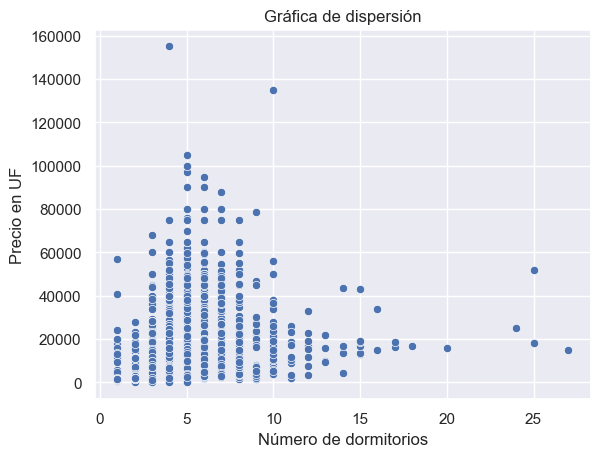

In [149]:
ax = sns.scatterplot(data=rl_data_dorms, x='dorms', y='price_uf')
ax.set_title("Gráfica de dispersión")
ax.set_xlabel("Número de dormitorios")
ax.set_ylabel("Precio en UF")
plt.show()

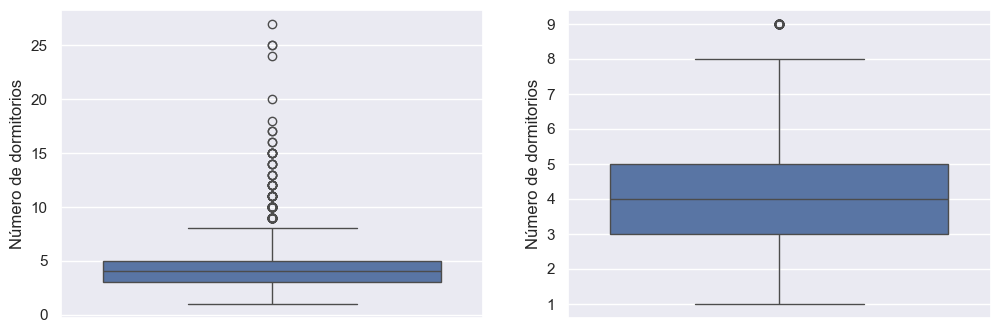

In [151]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
sns.boxplot(data=rl_data_dorms['dorms'],ax=axs[0])
sns.boxplot(data=rl_data_dorms[(rl_data_dorms['dorms']<10)& (rl_data_dorms['price_uf']<100000)]['dorms'],ax=axs[1])
plt.setp(axs, ylabel="Número de dormitorios")
plt.show()

**Decisión:** Dado que las casas con demasiados dormitorios distorsionan los datos, se elegirán como límites las casas con 10 dormitorios y un precio menor a 100.000 UF.


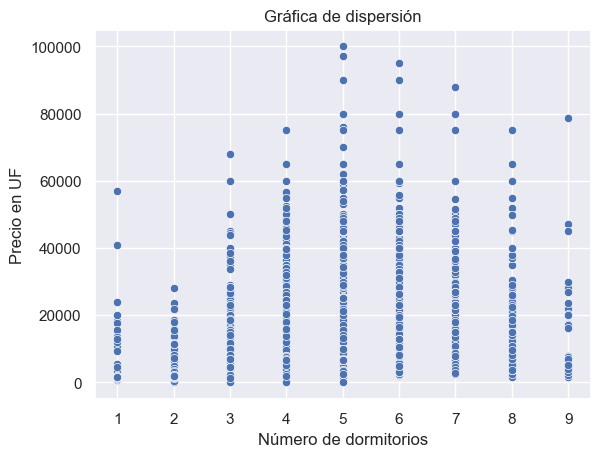

In [153]:
rl_data_dorms = rl_data_dorms[(rl_data_dorms['dorms']<10)& (rl_data_dorms['price_uf']<100000)]
ax = sns.scatterplot(data=rl_data_dorms, x='dorms', y='price_uf')
ax.set_title("Gráfica de dispersión")
ax.set_xlabel("Número de dormitorios")
ax.set_ylabel("Precio en UF")
plt.show()

- 4.1.2 Cálculo de la matriz de Covarianza, para entender las relaciones entre las variables:

In [155]:
#Calcular la matriz de covarianza
cov_mat_dorms = rl_data_dorms.cov()
cov_mat_dorms

price_uf        dorms
price_uf  1.112578e+08  6061.987877
dorms     6.061988e+03     1.713057

La covarianza entre price_uf y dorms es de 6061.99:
Esto sugiere que hay una relación positiva entre el número de dormitorios y el precio de las casas. A medida que el número de dormitorios aumenta, el precio en UF tiende a aumentar. Esto respalda la hipótesis de que existe una relación positiva entre estas dos variables.

Cálculo del coeficiente de correlación de Pearson, para entender las relaciones entre las variables:

Coeficiente de correlación de Pearson:
          price_uf   dorms
price_uf    1.0000  0.4391
dorms       0.4391  1.0000


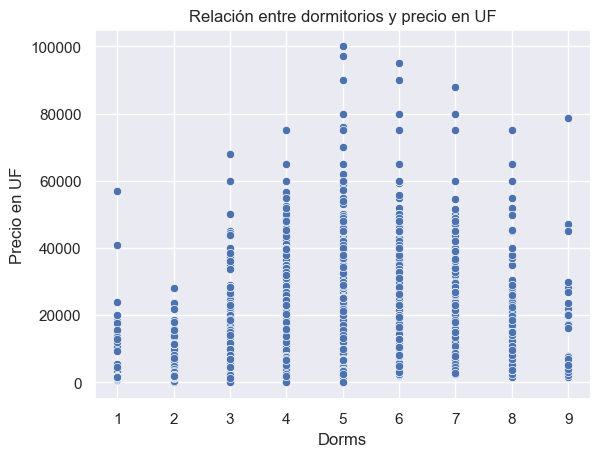

In [157]:
correlacion_dorms = rl_data_dorms[['price_uf', 'dorms']].corr(method='pearson')
print("Coeficiente de correlación de Pearson:")
print(correlacion_dorms)

# Visualizar la relación con un scatter plot
sns.scatterplot(data=rl_data_dorms, x='dorms', y='price_uf')
plt.title('Relación entre dormitorios y precio en UF')
plt.xlabel('Dorms')
plt.ylabel('Precio en UF')
plt.show()

La correlación es positiva moderada entre estas dos variables (0.4391). Existe una tendencia de que, a medida que aumenta el número de dormitorios, también aumenta el precio en UF.

Sin embargo, la dispersión sugiere que, aunque existe una correlación, el número de dormitorios por sí solo no explica completamente las variaciones de precio, y sería útil incluir otras variables en un modelo más completo (como el área construida, número de baños, etc.).

- 4.1.3 Cálculo de los Parámetros de la Regresión  
    - Recordamos que:  
$\hat{\beta_1} = \frac{\sum\limits_{i=1}^{n}(X_i-\bar{X})(Y_i-\bar{Y})}{\sum\limits_{i=1}^{n}(X_i-\bar{X})^2} = \frac{cov_{x,y}}{var_x}$

In [124]:
b_1 = cov_mat_dorms.iloc[0,1]/cov_mat_dorms.iloc[1,1]
print("El valor de b_1 es:", b_1)

El valor de b_1 es: 3538.6959428881323


$\hat{\beta_0} = \bar{Y} - \hat{\beta_1}\bar{X}$

In [126]:
b_0 = rl_data_dorms.price_uf.mean() - b_1*rl_data_dorms.dorms.mean()
print("El valor de b_0 es:", b_0)

El valor de b_0 es: -3702.960607949519


In [130]:
# Crear el dataframe con los valores predichos y sus errores
rl_final_dorms=rl_data_dorms.copy()
rl_final_dorms['predict']=b_1*rl_data_dorms.dorms + b_0
rl_final_dorms['error']=rl_final_dorms.price_uf - rl_final_dorms.predict
rl_final_dorms.head()

price_uf  dorms       predict        error
0     11500      7  21067.910992 -9567.910992
1      2950      2   3374.431278  -424.431278
2      3600      3   6913.127221 -3313.127221
3      2107      3   6913.127221 -4806.127221
4      1489      2   3374.431278 -1885.431278

- 4.1.4 Cálculo de las Evaluaciones del Ajuste  
    - Calculamos el $ESR$:  
$ESR = s_e,\ donde\ s_e^2=\frac{\sum{e_i}^2}{n-2} $



In [13]:
s_e2 = (rl_final_dorms.error**2).sum()/(len(rl_final_dorms.error)-2)
s_e = np.sqrt(s_e2)
print("El valor de ESR es:", s_e)

El valor de ESR es: 9477.234052709551


Calculamos el $R^2$  
    $R^2 = \frac{Cov^2(X,Y)}{Var(X)Var(Y)}$

In [14]:
r2 = cov_mat_dorms.iloc[0,1]**2/(cov_mat_dorms.iloc[0,0]*cov_mat_dorms.iloc[1,1])
print("El valor de r2 es:", r2)

El valor de r2 es: 0.19280922349120194


Comprobamos la igualdad de 
$R^2 = 1 - \frac{SR}{ST}$ 

In [15]:
SR = (rl_final_dorms.error**2).sum()
ST = ((rl_final_dorms.price_uf - rl_final_dorms.price_uf.mean())**2).sum()
r22 = 1-SR/ST
print("El valor de r2 es:", r22)

El valor de r2 es: 0.19280922349120178


- 4.1.5 Gráficas de Interés

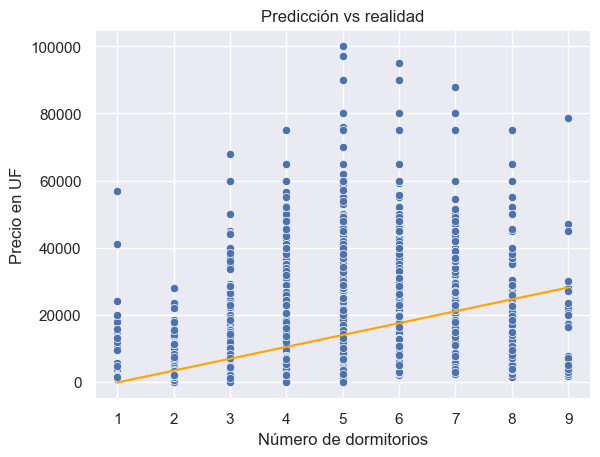

In [16]:
fig, ax = plt.subplots()
sns.scatterplot(data=rl_final_dorms, y='price_uf', x='dorms',ax=ax)
sns.lineplot(data=rl_final_dorms, x='dorms', y='predict', color='orange',ax=ax)
ax.set_title("Predicción vs realidad")
ax.set_xlabel("Número de dormitorios")
ax.set_ylabel("Precio en UF")
plt.show()

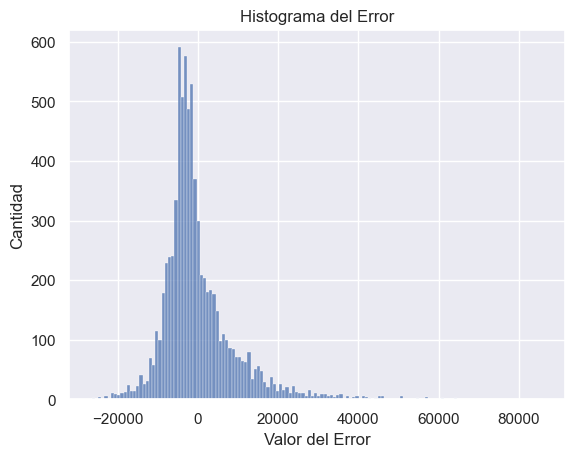

In [17]:
residuals=rl_final_dorms.error
fig = sns.histplot(residuals)
fig.set_xlabel("Valor del Error")
fig.set_ylabel("Cantidad")
fig.set_title("Histograma del Error")
plt.show()

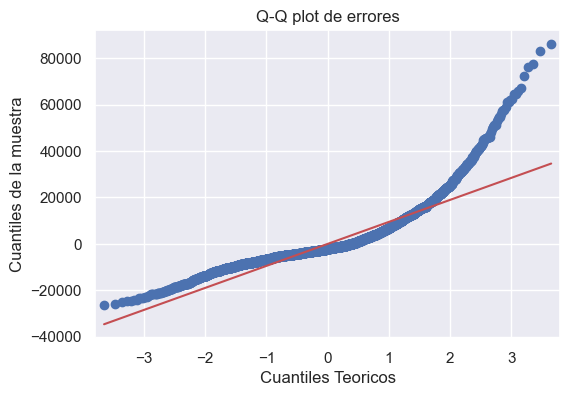

In [18]:
fig, ax = plt.subplots(figsize=(6,4))
sm.qqplot(residuals, line='s',ax= ax)
plt.title("Q-Q plot de errores")
ax.set_xlabel("Cuantiles Teoricos")
ax.set_ylabel("Cuantiles de la muestra")
plt.show()


##### 4.2 Análisis de Regresión Basado en el Área Construida
- 4.2.1 Selección de Datos


In [172]:
# Seleccionamos las columnas relevantes

# Guardamos el DataFrame resultante en una variable separada para la regresión

rl_data_built = df[["price_uf", "built_area"]]

# Primeras 5 filas
rl_data_built.head()

price_uf  built_area
0     11500       384.0
1      2950       112.0
2      3600        59.0
3      2107       103.0
4      1489        57.0

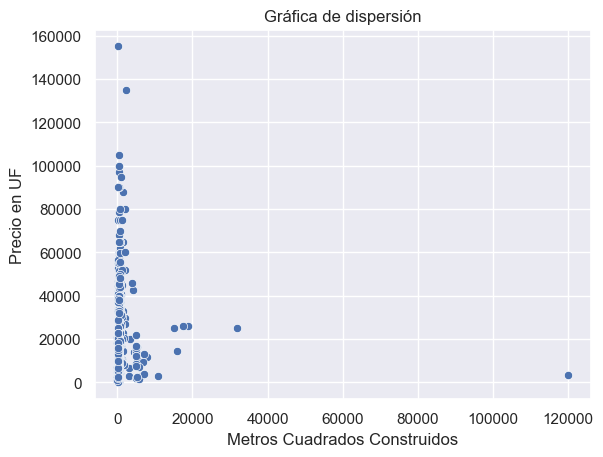

In [174]:
ax = sns.scatterplot(data=rl_data_built, x='built_area', y='price_uf')
ax.set_title("Gráfica de dispersión")
ax.set_xlabel("Metros Cuadrados Construidos")
ax.set_ylabel("Precio en UF")
plt.show()

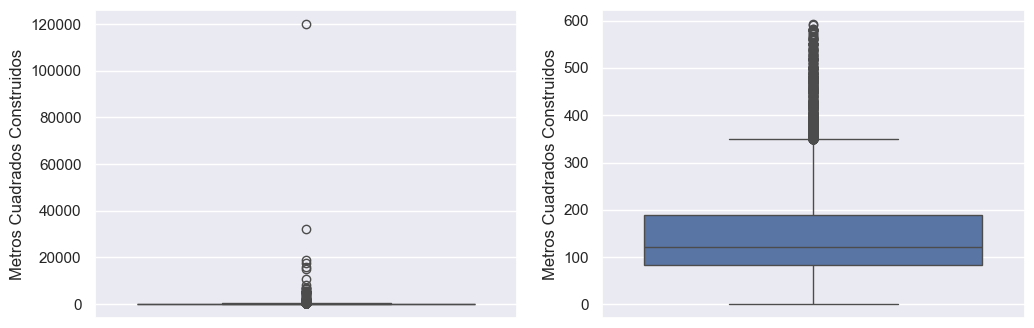

In [176]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
sns.boxplot(data=rl_data_built['built_area'],ax=axs[0])
sns.boxplot(data=rl_data_built[rl_data_built['built_area']<600]['built_area'],ax=axs[1])
plt.setp(axs, ylabel="Metros Cuadrados Construidos")
plt.show()

**Decisión:** Dado que existe una gran cantidad de outliers, se tomará un conjunto de datos reducido a las casas con menos de 600 $m^2$ construidos y valores bajo las 100.000 UF.

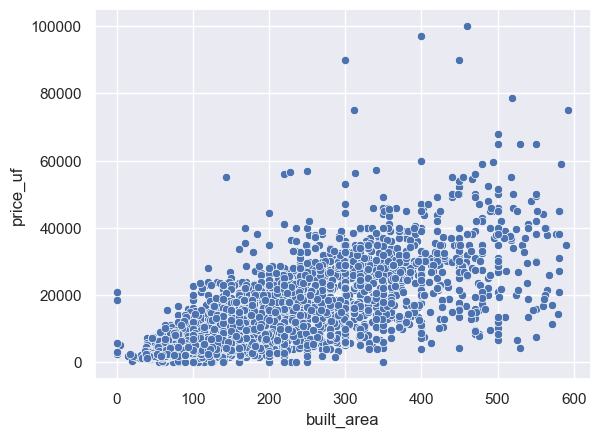

In [178]:
sns.scatterplot(data=rl_data_built[(rl_data_built['built_area']<600) & (rl_data_built['price_uf']<100000)], x='built_area', y='price_uf')
plt.show()

In [180]:
rl_data_built=rl_data_built[(rl_data_built['built_area']<600) & (rl_data_built['price_uf']<100000)]
rl_data_built.head()

price_uf  built_area
0     11500       384.0
1      2950       112.0
2      3600        59.0
3      2107       103.0
4      1489        57.0

- 4.2.2 Cálculo de la matriz de Covarianza

In [182]:
#Calcular la matriz de covarianza
cov_mat_built = rl_data_built.cov()
cov_mat_built

price_uf     built_area
price_uf    9.132823e+07  755270.298542
built_area  7.552703e+05   10191.175234

La covarianza entre price_uf y built_area es de 755.270:
Esto sugiere que hay una relación positiva entre el área construida y el precio de las casas. A medida que el área construida aumenta, el precio en UF tiende a aumentar. Esto respalda la hipótesis de que existe una relación positiva entre estas dos variables.

Cálculo del coeficiente de correlación de Pearson, para entender las relaciones entre las variables:

Coeficiente de correlación de Pearson:
            price_uf  built_area
price_uf    1.000000    0.782867
built_area  0.782867    1.000000


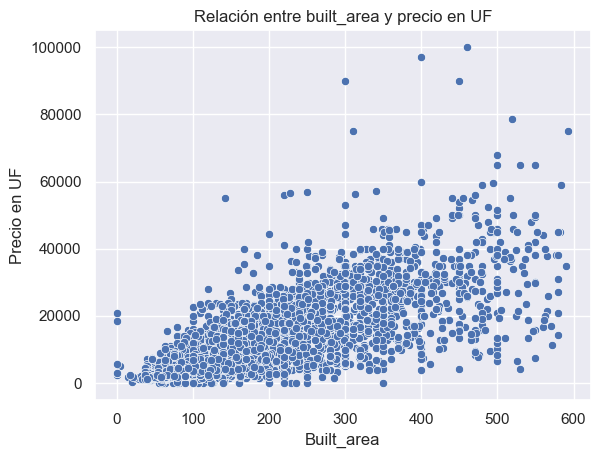

In [184]:
correlacion_builtarea = rl_data_built[['price_uf', 'built_area']].corr(method='pearson')
print("Coeficiente de correlación de Pearson:")
print(correlacion_builtarea)

# Visualizar la relación con un scatter plot
sns.scatterplot(data=rl_data_built, x='built_area', y='price_uf')
plt.title('Relación entre built_area y precio en UF')
plt.xlabel('Built_area')
plt.ylabel('Precio en UF')
plt.show()

La correlación es positiva entre estas dos variables (0.782867). Existe una fuerte tendencia de que, a medida que aumenta el 'area construida, también aumenta el precio en UF.

- 4.2.3 Cálculo de los Parámetros de la Regresión  
    - Recordamos que:  
$\hat{\beta_1} = \frac{\sum\limits_{i=1}^{n}(X_i-\bar{X})(Y_i-\bar{Y})}{\sum\limits_{i=1}^{n}(X_i-\bar{X})^2} = \frac{cov_{x,y}}{var_x}$

In [25]:
b_1_built = cov_mat_built.iloc[0,1]/cov_mat_built.iloc[1,1]
print("El valor de b_1 es:", b_1_built)

El valor de b_1 es: 74.11022587609492


$\hat{\beta_0} = \bar{Y} - \hat{\beta_1}\bar{X}$

In [26]:
b_0_built = rl_data_built.price_uf.mean() - b_1_built*rl_data_built.built_area.mean()
print("El valor de b_0 es:", b_0_built)

El valor de b_0 es: -1823.3842201881507


In [27]:
# Crear el dataframe con los valores predichos y sus errores
rl_final_built=rl_data_built.copy()
rl_final_built['predict']=b_1_built*rl_final_built.built_area + b_0_built
rl_final_built['error']=rl_final_built.price_uf - rl_final_built.predict
rl_final_built.head()

price_uf  built_area       predict         error
0     11500       384.0  26634.942516 -15134.942516
1      2950       112.0   6476.961078  -3526.961078
2      3600        59.0   2549.119107   1050.880893
3      2107       103.0   5809.969045  -3702.969045
4      1489        57.0   2400.898655   -911.898655

- 4.2.4 Cálculo de las Evaluaciones del Ajuste  
    - Calculamos el $ESR$:  
$ESR = s_e,\ donde\ s_e^2=\frac{\sum{e_i}^2}{n-2} $



In [28]:
s_e2 = (rl_final_built.error**2).sum()/(len(rl_final_built.error)-2)
s_e = np.sqrt(s_e2)
print("El valor de ESR es:", s_e)

El valor de ESR es: 5946.397463957594


Calculamos el $R^2$  
    $R^2 = \frac{Cov^2(X,Y)}{Var(X)Var(Y)}$

In [29]:
r2 = cov_mat_built.iloc[0,1]**2/(cov_mat_built.iloc[0,0]*cov_mat_built.iloc[1,1])
print("El valor de r2 es:", r2)

El valor de r2 es: 0.6128800805137494


Comprobamos la igualdad de 
$R^2 = 1 - \frac{SR}{ST}$ 

In [30]:
SR = (rl_final_built.error**2).sum()
ST = ((rl_final_built.price_uf - rl_final_built.price_uf.mean())**2).sum()
r22 = 1-SR/ST
print("El valor de r2 es:", r22)

El valor de r2 es: 0.6128800805137491


- 4.1.5 Gráficas de Interés

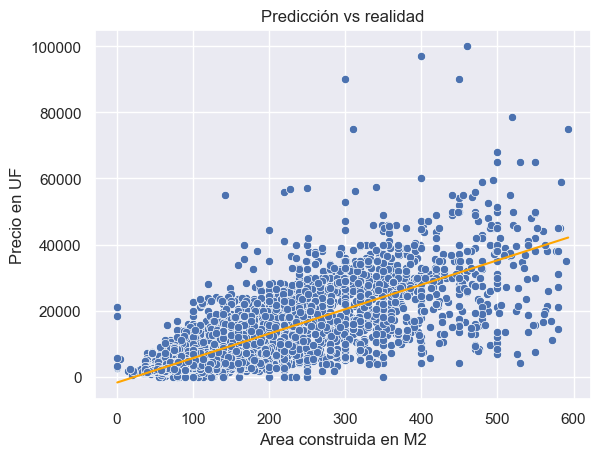

In [31]:
fig, ax = plt.subplots()
sns.scatterplot(data=rl_final_built, y='price_uf', x='built_area',ax=ax)
sns.lineplot(data=rl_final_built, x='built_area', y='predict', color='orange',ax=ax)
ax.set_title("Predicción vs realidad")
ax.set_xlabel("Area construida en M2")
ax.set_ylabel("Precio en UF")
plt.show()

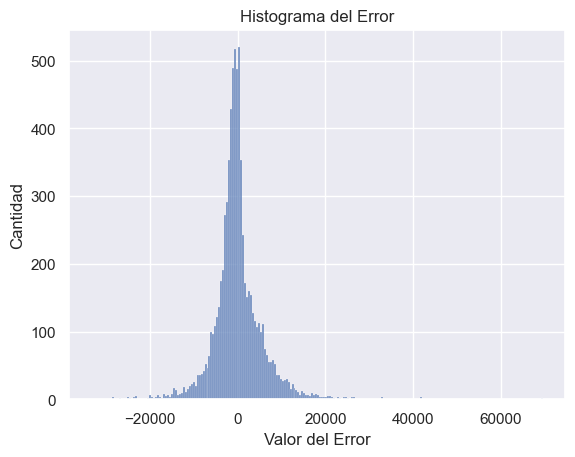

In [32]:
residuals_built=rl_final_built.error
fig = sns.histplot(residuals_built)
fig.set_xlabel("Valor del Error")
fig.set_ylabel("Cantidad")
fig.set_title("Histograma del Error")
plt.show()

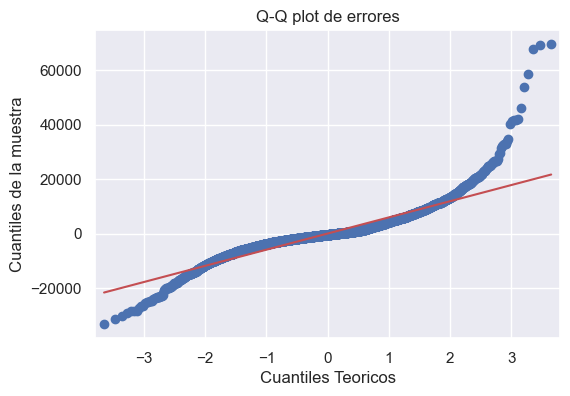

In [33]:
fig, ax = plt.subplots(figsize=(6,4))
sm.qqplot(residuals_built, line='s',ax= ax)
plt.title("Q-Q plot de errores")
ax.set_xlabel("Cuantiles Teoricos")
ax.set_ylabel("Cuantiles de la muestra")
plt.show()

## Extras

In [34]:
# Definir una función para ajustar el modelo de regresión lineal
def regression_by_group(group,col):
    X = group[col]  # Variable independiente (número de dormitorios)
    y = group['price_uf']  # Variable dependiente (precio)
    X = sm.add_constant(X)  # Añadir constante para la intersección
    model = sm.OLS(y, X).fit()  # Ajustar el modelo OLS
    group['predicted'] = model.predict()
    return model  # Devolver el modelo y el grupo

In [35]:
# Eliminamos las comunas que no tengan más de 20 instancias 
df2 = df.groupby('comuna').filter(lambda x: x.shape[0] >= 20).copy()
df2 = df2.query("(dorms < 10) & (price_uf < 100000)")
df2 = df2.groupby('comuna').filter(lambda x: x.shape[0] >= 20)

In [36]:
df3 = df.groupby('comuna').filter(lambda x: x.shape[0] >= 20).copy()
df3 = df3.query("(built_area < 600) & (built_area < 100000)")
df3 = df3.groupby('comuna').filter(lambda x: x.shape[0] >= 20)

In [37]:
# Agrupar por comuna y aplicar la función de regresión
resultados_dorm = df2.groupby('comuna').apply(regression_by_group,'dorms')

d=[]
# Mostrar los resultados para cada comuna (es largisimo)
for comuna, resultado in resultados_dorm.items():
    d.append(
        {
            "Comuna": comuna,
            "R^2": resultado.rsquared,
            "ESR": (resultado.resid**2/(len(resultado.resid)-2)).sum()**0.5,
        }


    )
df_result_dorm=pd.DataFrame(d)    

In [38]:
resultados_built = df3.groupby('comuna').apply(regression_by_group,'built_area')

d=[]
# Mostrar los resultados para cada comuna (es largisimo)
for comuna, resultado in resultados_built.items():
    d.append(
        {
            "Comuna": comuna,
            "R^2": resultado.rsquared,
            "ESR": (resultado.resid**2/(len(resultado.resid)-2)).sum()**0.5,
        }


    )
df_result_built=pd.DataFrame(d)  

In [39]:
df_result_dorm.set_index('Comuna', inplace=True)
df_result_built.set_index('Comuna', inplace=True)
df_result = df_result_dorm.join(df_result_built, lsuffix='_dorm', rsuffix='_built')

In [40]:
df_result

R^2_dorm      ESR_dorm  R^2_built    ESR_built
Comuna                                                           
Buin               0.428142   3113.475727   0.534250  2492.269194
CaleradeTango      0.295670   4432.733218   0.776905  2569.147847
Cerrillos          0.022714   1494.684093   0.199612  1352.660641
CerroNavia         0.044638   1210.759072   0.552049  1089.759639
Colina             0.279870   8194.612156   0.664569  4980.523489
Conchalí           0.000260   2136.724751   0.257909  1815.626320
Curacaví           0.671390   3074.946855        NaN          NaN
ElBosque           0.008862   2841.184761   0.175808  1996.577142
EstaciónCentral    0.198845   3185.822569   0.475958  2576.595608
Huechuraba         0.070318   5603.764408   0.692050  3225.168465
Independencia      0.061901  10123.672823   0.444842  7088.714817
IsladeMaipo        0.271880   3734.646238   0.878834  1523.487969
LaCisterna         0.094236   2788.571150   0.320194  2415.831912
LaFlorida          0.121679   3650.613177   0.270636  3246.084703
LaGranja           0.095002   1471.139560   0.361098   998.662942
LaPintana          0.071417   3157.669849   0.792272  1493.494854
LaReina            0.122716   8665.188991   0.520492  5958.904754
Lampa              0.108703   2510.568804   0.515564  1847.643655
LasCondes          0.155929  11008.549271   0.431504  9257.093755
LoBarnechea        0.117361  11985.104035   0.508966  7933.551384
LoEspejo           0.237371   1321.873857   0.722976   769.106107
LoPrado            0.160691    990.517633   0.368750   859.017272
Macul              0.096200   3639.185842   0.559606  2449.291499
Maipú              0.104501   2064.392725   0.402357  1664.752040
Melipilla          0.204279   2930.245064   0.508315  2285.814029
PadreHurtado       0.151314   2251.714855   0.588595  1497.243327
Paine              0.320150   3876.762654   0.892191  1543.799655
PedroAguirreCerda  0.061135   1191.913466   0.421526   935.588593
Peñaflor           0.261710   3955.445630   0.698590  2207.123004
Peñalolén          0.068712   5100.919372   0.508981  3716.560334
Pirque             0.069484  12161.016075   0.718796  6866.102169
Providencia        0.122328   7671.388525   0.461233  6094.106550
Pudahuel           0.075157   3026.856806   0.360078  2522.707308
PuenteAlto         0.110270   1856.183725   0.492442  1388.278677
Quilicura          0.099265   1660.708364   0.517437  1215.546783
QuintaNormal       0.079769   3777.898169   0.284501  3331.243357
Recoleta           0.160179   4086.575188   0.350720  3357.354317
Renca              0.086918   1085.560628   0.246111   986.400048
SanBernardo        0.071239   3664.361528   0.399336  2891.295033
SanJoaquín         0.045366   2248.721261   0.208218  1928.480471
SanMiguel          0.105281   3941.271172   0.061624  3858.906995
SanRamón           0.091211    894.876938   0.089703   895.619152
Santiago           0.057599   8166.917674   0.389287  5471.129060
Talagante          0.276138   6932.895645   0.839780  2371.399689
Vitacura           0.217060  13431.970639   0.663550  7336.110473
Ñuñoa              0.274135   4710.054055   0.471161  4066.076225

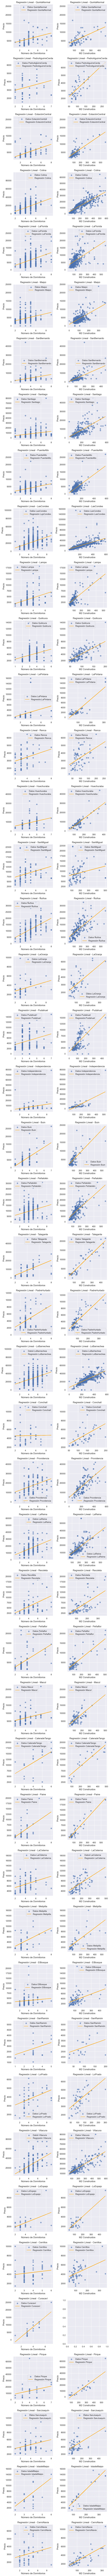

In [41]:
def grupo_regresion(group, resultados):
    # Predecir los valores usando el modelo ajustado
    group['predicted'] = resultados[group.name].predict()
    # Devolver el grupo con la columna de valores predichos
    return group

df_predicho_dorm = df2.groupby('comuna').apply(grupo_regresion,resultados_dorm)
df_predicho_built = df3.groupby('comuna').apply(grupo_regresion,resultados_built)
comunas = df2['comuna'].unique()
num_comunas = len(comunas)



# Iterar por cada comuna para crear subgráficos
fig, axs = plt.subplots(num_comunas, 2, figsize=(8, num_comunas * 4))  # Un gráfico por fila

#  Iterar por cada comuna para crear un gráfico separado
for i, comuna in enumerate(comunas):
    comuna_data = df_predicho_dorm[df_predicho_dorm['comuna'] == comuna]
    
    # Scatter plot de los datos reales en su subplot respectivo
    axs[i,0].scatter(comuna_data['dorms'], comuna_data['price_uf'], label=f'Datos {comuna}', alpha=0.6)
    
    # Línea de regresión en el mismo subplot
    axs[i,0].plot(comuna_data['dorms'], comuna_data['predicted'], color='orange', label=f'Regresión {comuna}')
    
    # Añadir título y etiquetas a cada subplot
    axs[i,0].set_title(f'Regresión Lineal - {comuna}')
    axs[i,0].set_xlabel('Número de Dormitorios')
    axs[i,0].set_ylabel('Precio')
    axs[i,0].legend()

for i, comuna in enumerate(comunas):
    comuna_data = df_predicho_built[df_predicho_built['comuna'] == comuna]
    if comuna== 'Curacaví': continue
    # Scatter plot de los datos reales en su subplot respectivo
    axs[i,1].scatter(comuna_data['built_area'], comuna_data['price_uf'], label=f'Datos {comuna}', alpha=0.6)
    
    # Línea de regresión en el mismo subplot
    axs[i,1].plot(comuna_data['built_area'], comuna_data['predicted'], color='orange', label=f'Regresión {comuna}')
    
    # Añadir título y etiquetas a cada subplot
    axs[i,1].set_title(f'Regresión Lineal - {comuna}')
    axs[i,1].set_xlabel('M2 Construidos')
    axs[i,1].set_ylabel('Precio')
    axs[i,1].legend()    

# Ajustar el layout para evitar sobreposiciones
plt.tight_layout()
plt.show()